# **Discrimination of essential oils exposed and non-exposed to gamma rays using Raman spectroscopy and machine learning**

### **Authors:** *Paul Vargas Jentzsch (a), Sebastián Sarasti Zambonino (a), Daniela Ramirez (a), Gonzalo Jácome Camacho (a), Marco Sinche Serra (a), Edwin Vera (b), Roque Santos(a), Luis Ramos Guerrero (c), Valerian Ciobotă (d)

### **Notebook created by:** **Sebastián Sarasti Zambonino**

### **Institutions:**
a) Departamento de Ciencias Nucleares, Facultad de Ingeniería
Química y Agroindustria, Escuela Politécnica Nacional,
Ladrón de Guevara E11-253, 170525 Quito, Ecuador

b) Departamento de Ciencias de Alimentos y Biotecnología, Facultad de Ingeniería
Química y Agroindustria, Escuela Politécnica Nacional,
Ladrón de Guevara E11-253, 170525 Quito, Ecuador

c) Centro de Investigación de Alimentos, CIAL, Universidad UTE, 
Av. Mariscal Sucre y Mariana de Jesús, 170527 Quito, Ecuador

d) Rigaku Analytical Devices, Inc.,
30 Upton Drive, Suite 2
01887 Wilmington, USA


## Important announcement

This notebook serves as a guide throughout all the work done. The model traning is not shown because it was done in other notebooks. Running the training notebooks is computationally expensive. The final models are only loaded to measure the performance. If you were interested in the training stage, please, you should reach Sebastian Sarasti Zambonino out by his e-mail (sebastian.sarasti@epn.edu.ec). 

# Data Loading
Import basic libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#@title
# Set 14 as fontsize for all matplotlib graphs
plt.rc('font', size=14)
plt.rc('axes', titlesize=14)
plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)
plt.rc('legend', fontsize=14)

Mount drive and load data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Load models previously trained

In [ ]:
#@title
model_dose_dir = '/content/drive/MyDrive/#6 Aceites irradiados/modelos/models 2/model_dose.pkl'
model_is_dir = '/content/drive/MyDrive/#6 Aceites irradiados/modelos/models 2/model_is.pkl'
model_i_dir = '/content/drive/MyDrive/#6 Aceites irradiados/modelos/models 2/model_i.pkl'
scaler_dir = '/content/drive/MyDrive/#6 Aceites irradiados/modelos/models 2/scaler.pkl'

In [ ]:
#@title
df = pd.read_csv('/content/drive/MyDrive/#6 Aceites irradiados/modelos/models 2/test_data.csv', index_col = 0)

In [ ]:
#@title
with open(model_dose_dir, 'rb') as f:
    model_dose = pickle.load(f)
with open(model_is_dir, 'rb') as f:
    model_is = pickle.load(f)
with open(model_i_dir, 'rb') as f:
    model_i = pickle.load(f)
with open(scaler_dir, 'rb') as f:
    scaler = pickle.load(f)

Process data with scaler

In [ ]:
X = df.iloc[:,511:1022]
Y1 = df.loc[:,'Dosis']
Y2 = df.loc[:,'Irradiation Stage']
Y3 = df.loc[:,'Irradiation']

In [ ]:
X = scaler.transform(X)

Prediction of the dose

In [ ]:
Y_dose = model_dose.predict(X)

In [ ]:
Y_is = model_is.predict(X)

In [ ]:
Y_i = model_i.predict(X)

# Models Yield
See the performace of the data

In [ ]:
#@title
from sklearn.metrics import classification_report

## Dose prediction

It is going to be evaluated the precision, recall and F1-score for each classification carried out.

In [ ]:
#@title
print(classification_report(Y1, Y_dose))

              precision    recall  f1-score   support

         0.0       0.98      0.89      0.94        66
        10.0       0.71      0.84      0.77        92
        15.0       0.68      0.58      0.62        73
        20.0       0.76      0.76      0.76        79

    accuracy                           0.77       310
   macro avg       0.78      0.77      0.77       310
weighted avg       0.77      0.77      0.77       310



## Irradiation Stage Prediction

In [ ]:
#@title
print(classification_report(Y2, Y_is))

                precision    recall  f1-score   support

Not irradiated       1.00      0.89      0.94        66
           Oil       0.98      0.95      0.96       110
        Sample       0.92      0.99      0.95       134

      accuracy                           0.95       310
     macro avg       0.97      0.94      0.95       310
  weighted avg       0.96      0.95      0.95       310



## Irradiation Prediction

In [ ]:
#@title
print(classification_report(Y3, Y_i))

              precision    recall  f1-score   support

           0       1.00      0.88      0.94        66
           1       0.97      1.00      0.98       244

    accuracy                           0.97       310
   macro avg       0.98      0.94      0.96       310
weighted avg       0.98      0.97      0.97       310



Get the probabilities to analyze the histograms of the classification

In [ ]:
#@title
Y_dose_proba = model_dose.predict_proba(X)

In [ ]:
#@title
Y_is_proba = model_is.predict_proba(X)

In [ ]:
#@title
Y_i_proba = model_i.predict_proba(X)

In [ ]:
#@title
from copy import deepcopy

In [ ]:
#@title
df_class_dose = deepcopy(df[['Dosis', 'Irradiation Stage', 'Irradiation']])
dose = list(set(df_class_dose.Dosis))

In [ ]:
#@title
for i in range(4):
  a = Y_dose_proba[:,i]
  b = Y_dose_proba[:, np.arange(Y_dose_proba.shape[1]) != i].sum(axis = 1)
  df_class_dose[str(dose[i])] = a
  df_class_dose[str(dose[i])+'_rest'] = b
  df_class_dose[str(dose[i])+'hue'] = df_class_dose['Dosis'].apply((lambda x: 1 if x == (dose[i]) else 0))


In [ ]:
#@title
import seaborn as sns

In [ ]:
#@title
df_class_dose = df_class_dose.reset_index()

See the probabilities how look like

In [ ]:
df_class_dose.head()

,index,Dosis,Irradiation Stage,Irradiation,0.0,0.0_rest,0.0hue,10.0,10.0_rest,10.0hue,20.0,20.0_rest,20.0hue,15.0,15.0_rest,15.0hue
0,300,0.0,Not irradiated,0,0.490912,0.509088,1,0.129385,0.870615,0,0.053239,0.946761,0,0.326464,0.673536,0
1,74,15.0,Sample,1,0.101551,0.898449,0,0.172612,0.827388,0,0.559226,0.440774,0,0.166611,0.833389,1
2,273,10.0,Sample,1,0.093873,0.906127,0,0.636217,0.363783,1,0.165878,0.834122,0,0.104031,0.895969,0
3,66,10.0,Oil,1,0.036036,0.963964,0,0.526314,0.473686,1,0.178257,0.821743,0,0.259393,0.740607,0
4,22,10.0,Oil,1,0.038193,0.961807,0,0.721497,0.278503,1,0.163683,0.836317,0,0.076627,0.923373,0


## Histograms if classification



### Dose clasification

The histograms are going to be 4 because there are only 4 labels

In [ ]:
#@title
model_dose.classes_

array([ 0., 10., 15., 20.])

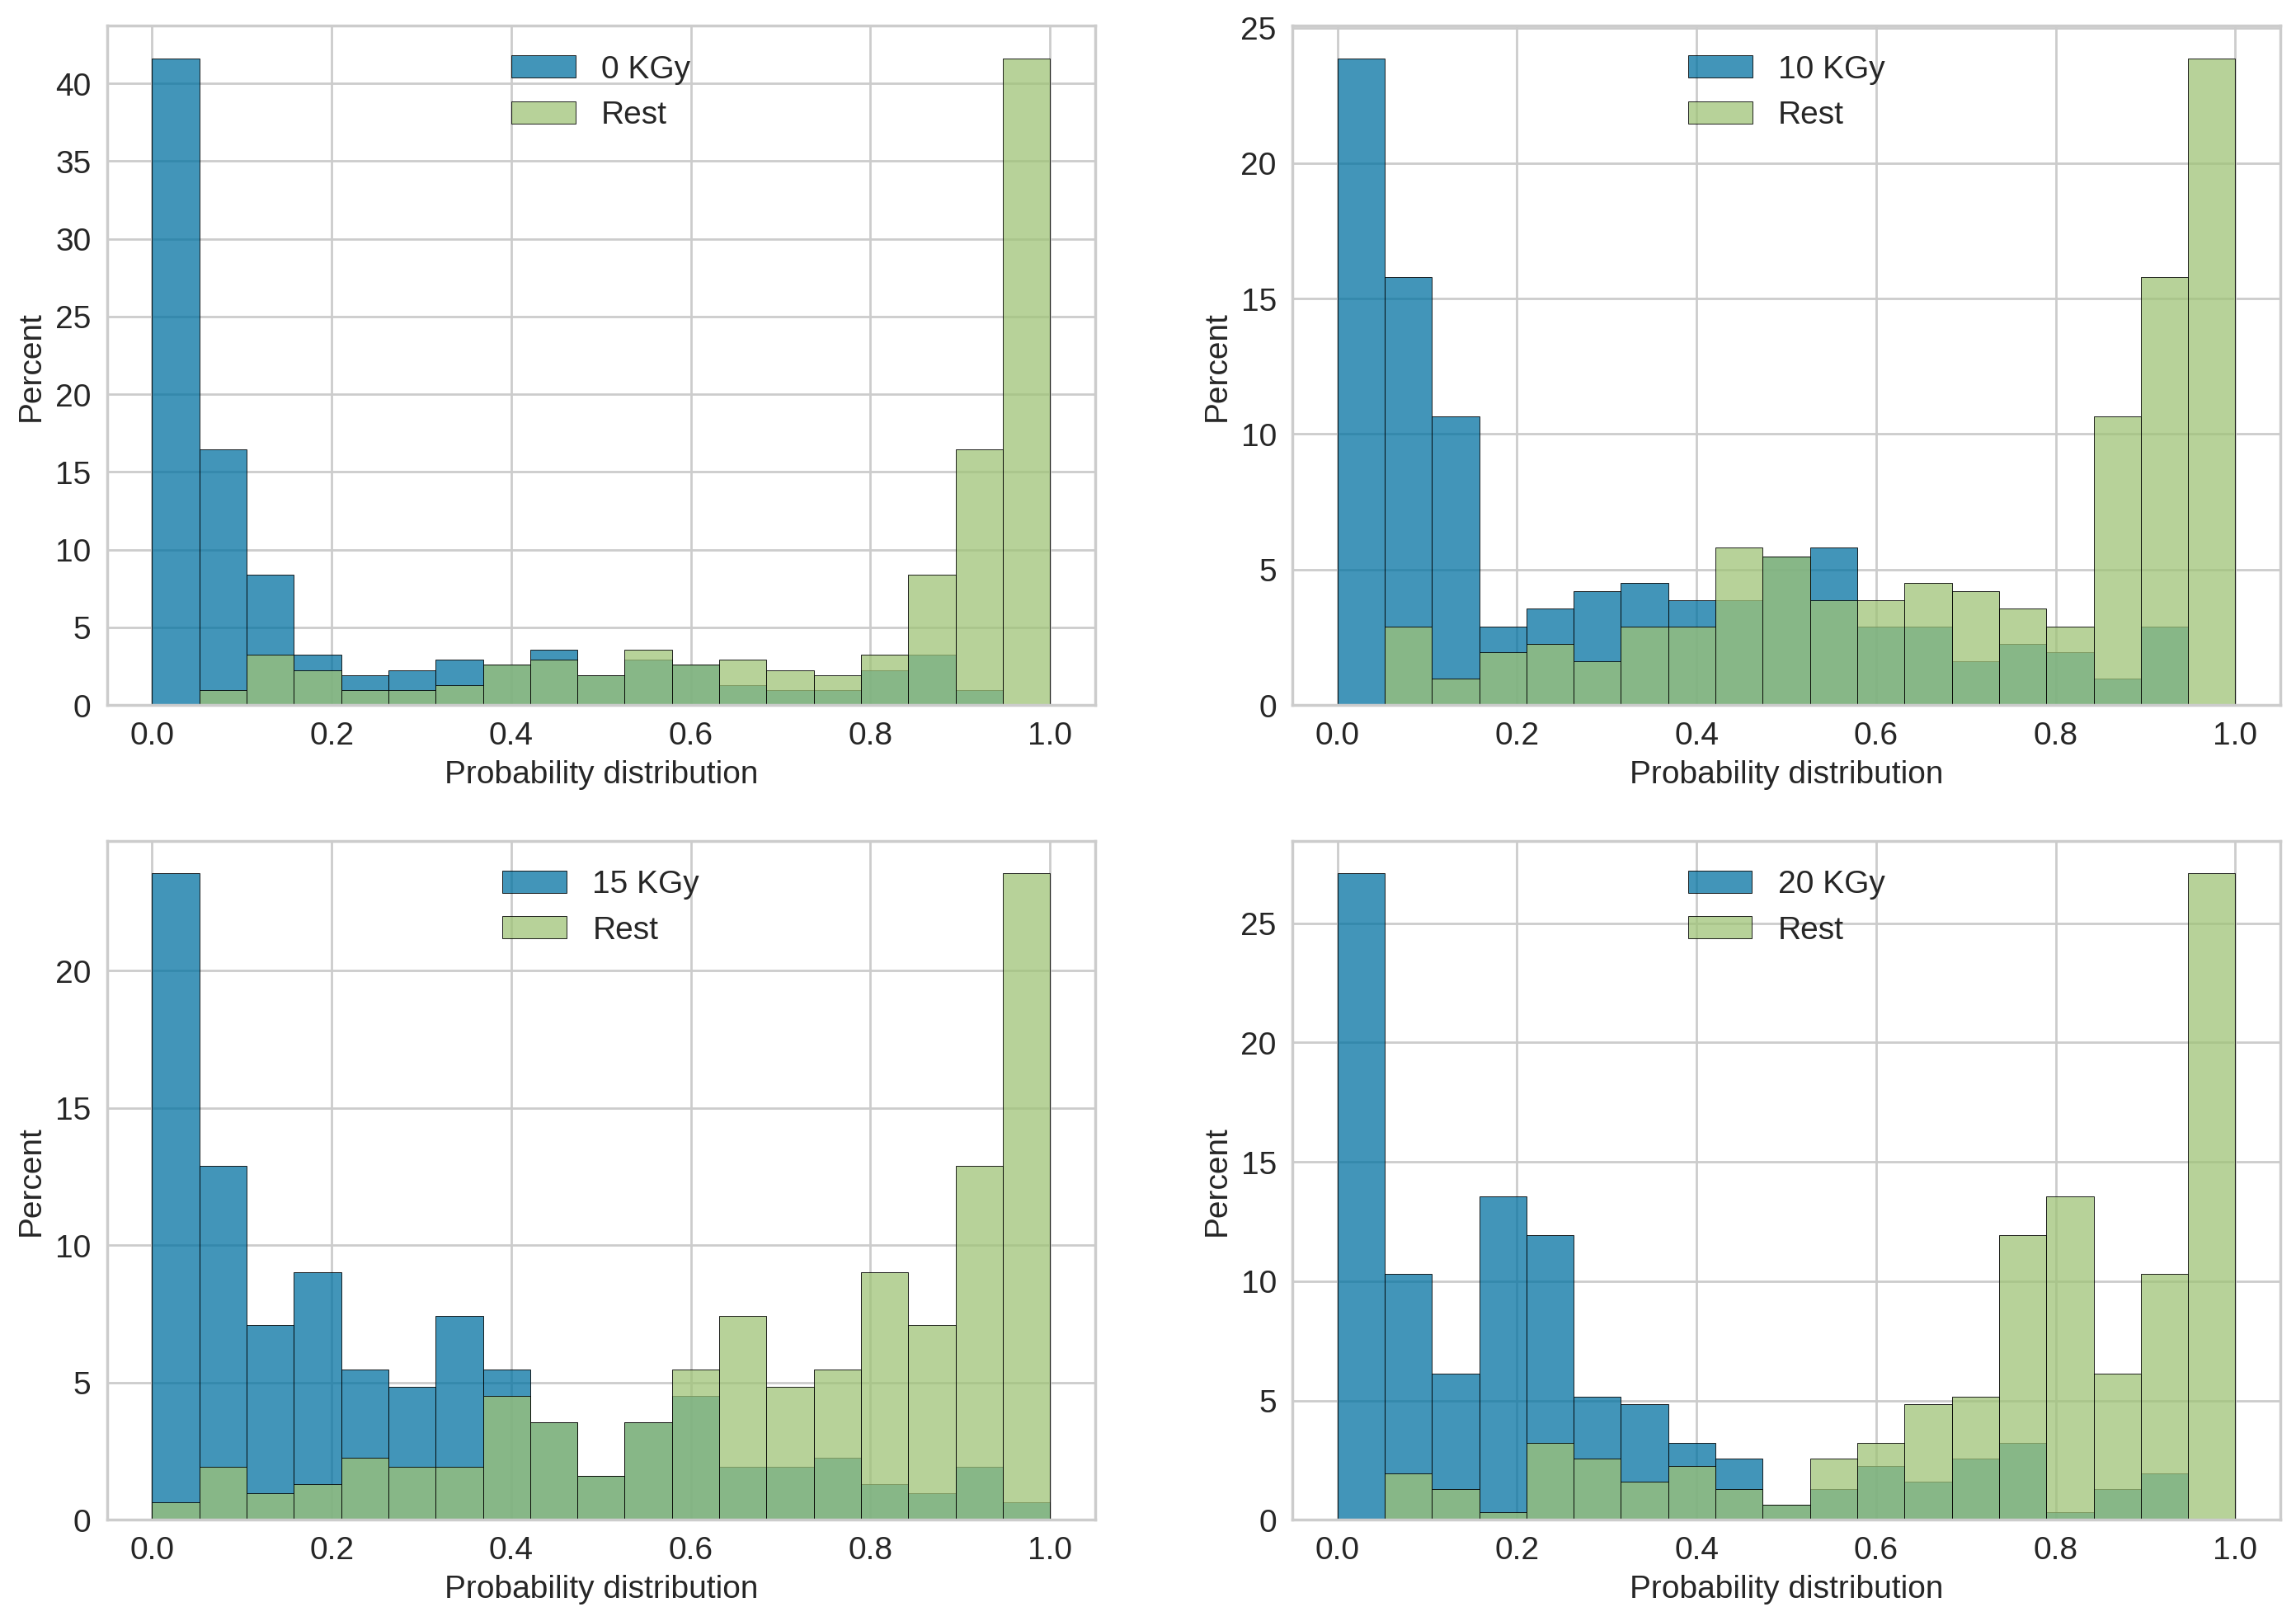

In [ ]:
#@title
plt.figure(figsize= (17,12), dpi = 200)
plt.subplot(2,2,1)
sns.histplot(data = df_class_dose, x = '0.0', color = 'b', label = '0 KGy', bins =np.linspace(0,1,20,endpoint=True), stat = 'percent')
sns.histplot(data = df_class_dose, x = '0.0_rest', color = 'g', label = 'Rest', bins =np.linspace(0,1,20,endpoint=True), stat = 'percent')
plt.xlabel('Probability distribution')
plt.legend()
plt.subplot(2,2,2)
sns.histplot(data = df_class_dose, x = '10.0', color = 'b', label = '10 KGy', bins =np.linspace(0,1,20,endpoint=True), stat = 'percent')
sns.histplot(data = df_class_dose, x = '10.0_rest', color = 'g', label = 'Rest', bins =np.linspace(0,1,20,endpoint=True), stat = 'percent')
plt.xlabel('Probability distribution')
plt.legend()
plt.subplot(2,2,3)
sns.histplot(data = df_class_dose, x = '15.0', color = 'b', label = '15 KGy', bins =np.linspace(0,1,20,endpoint=True), stat = 'percent')
sns.histplot(data = df_class_dose, x = '15.0_rest', color = 'g', label = 'Rest', bins =np.linspace(0,1,20,endpoint=True), stat = 'percent')
plt.xlabel('Probability distribution')
plt.legend()
plt.subplot(2,2,4)
sns.histplot(data = df_class_dose, x = '20.0', color = 'b', label = '20 KGy', bins =np.linspace(0,1,20,endpoint=True), stat = 'percent')
sns.histplot(data = df_class_dose, x = '20.0_rest', color = 'g', label = 'Rest', bins =np.linspace(0,1,20,endpoint=True), stat = 'percent')
plt.xlabel('Probability distribution')
plt.legend()

### Irradiation Stage Classification

The histograms are going to be three according to the labels, so one subplot is generated for each label (3 subplots).

In [ ]:
#@title
model_is.classes_

array(['Not irradiated', 'Oil', 'Sample'], dtype=object)

In [ ]:
#@title
ir = list(set(df_class_dose['Irradiation Stage']))

In [ ]:
#@title
for i in range(3):
  a = Y_is_proba[:,i]
  b = Y_is_proba[:, np.arange(Y_is_proba.shape[1]) != i].sum(axis = 1)
  df_class_dose[str(ir[i])] = a
  df_class_dose[str(ir[i])+'_rest'] = b
  df_class_dose[str(ir[i])+'hue'] = df_class_dose['Irradiation Stage'].apply((lambda x: 1 if x == (ir[i]) else 0))

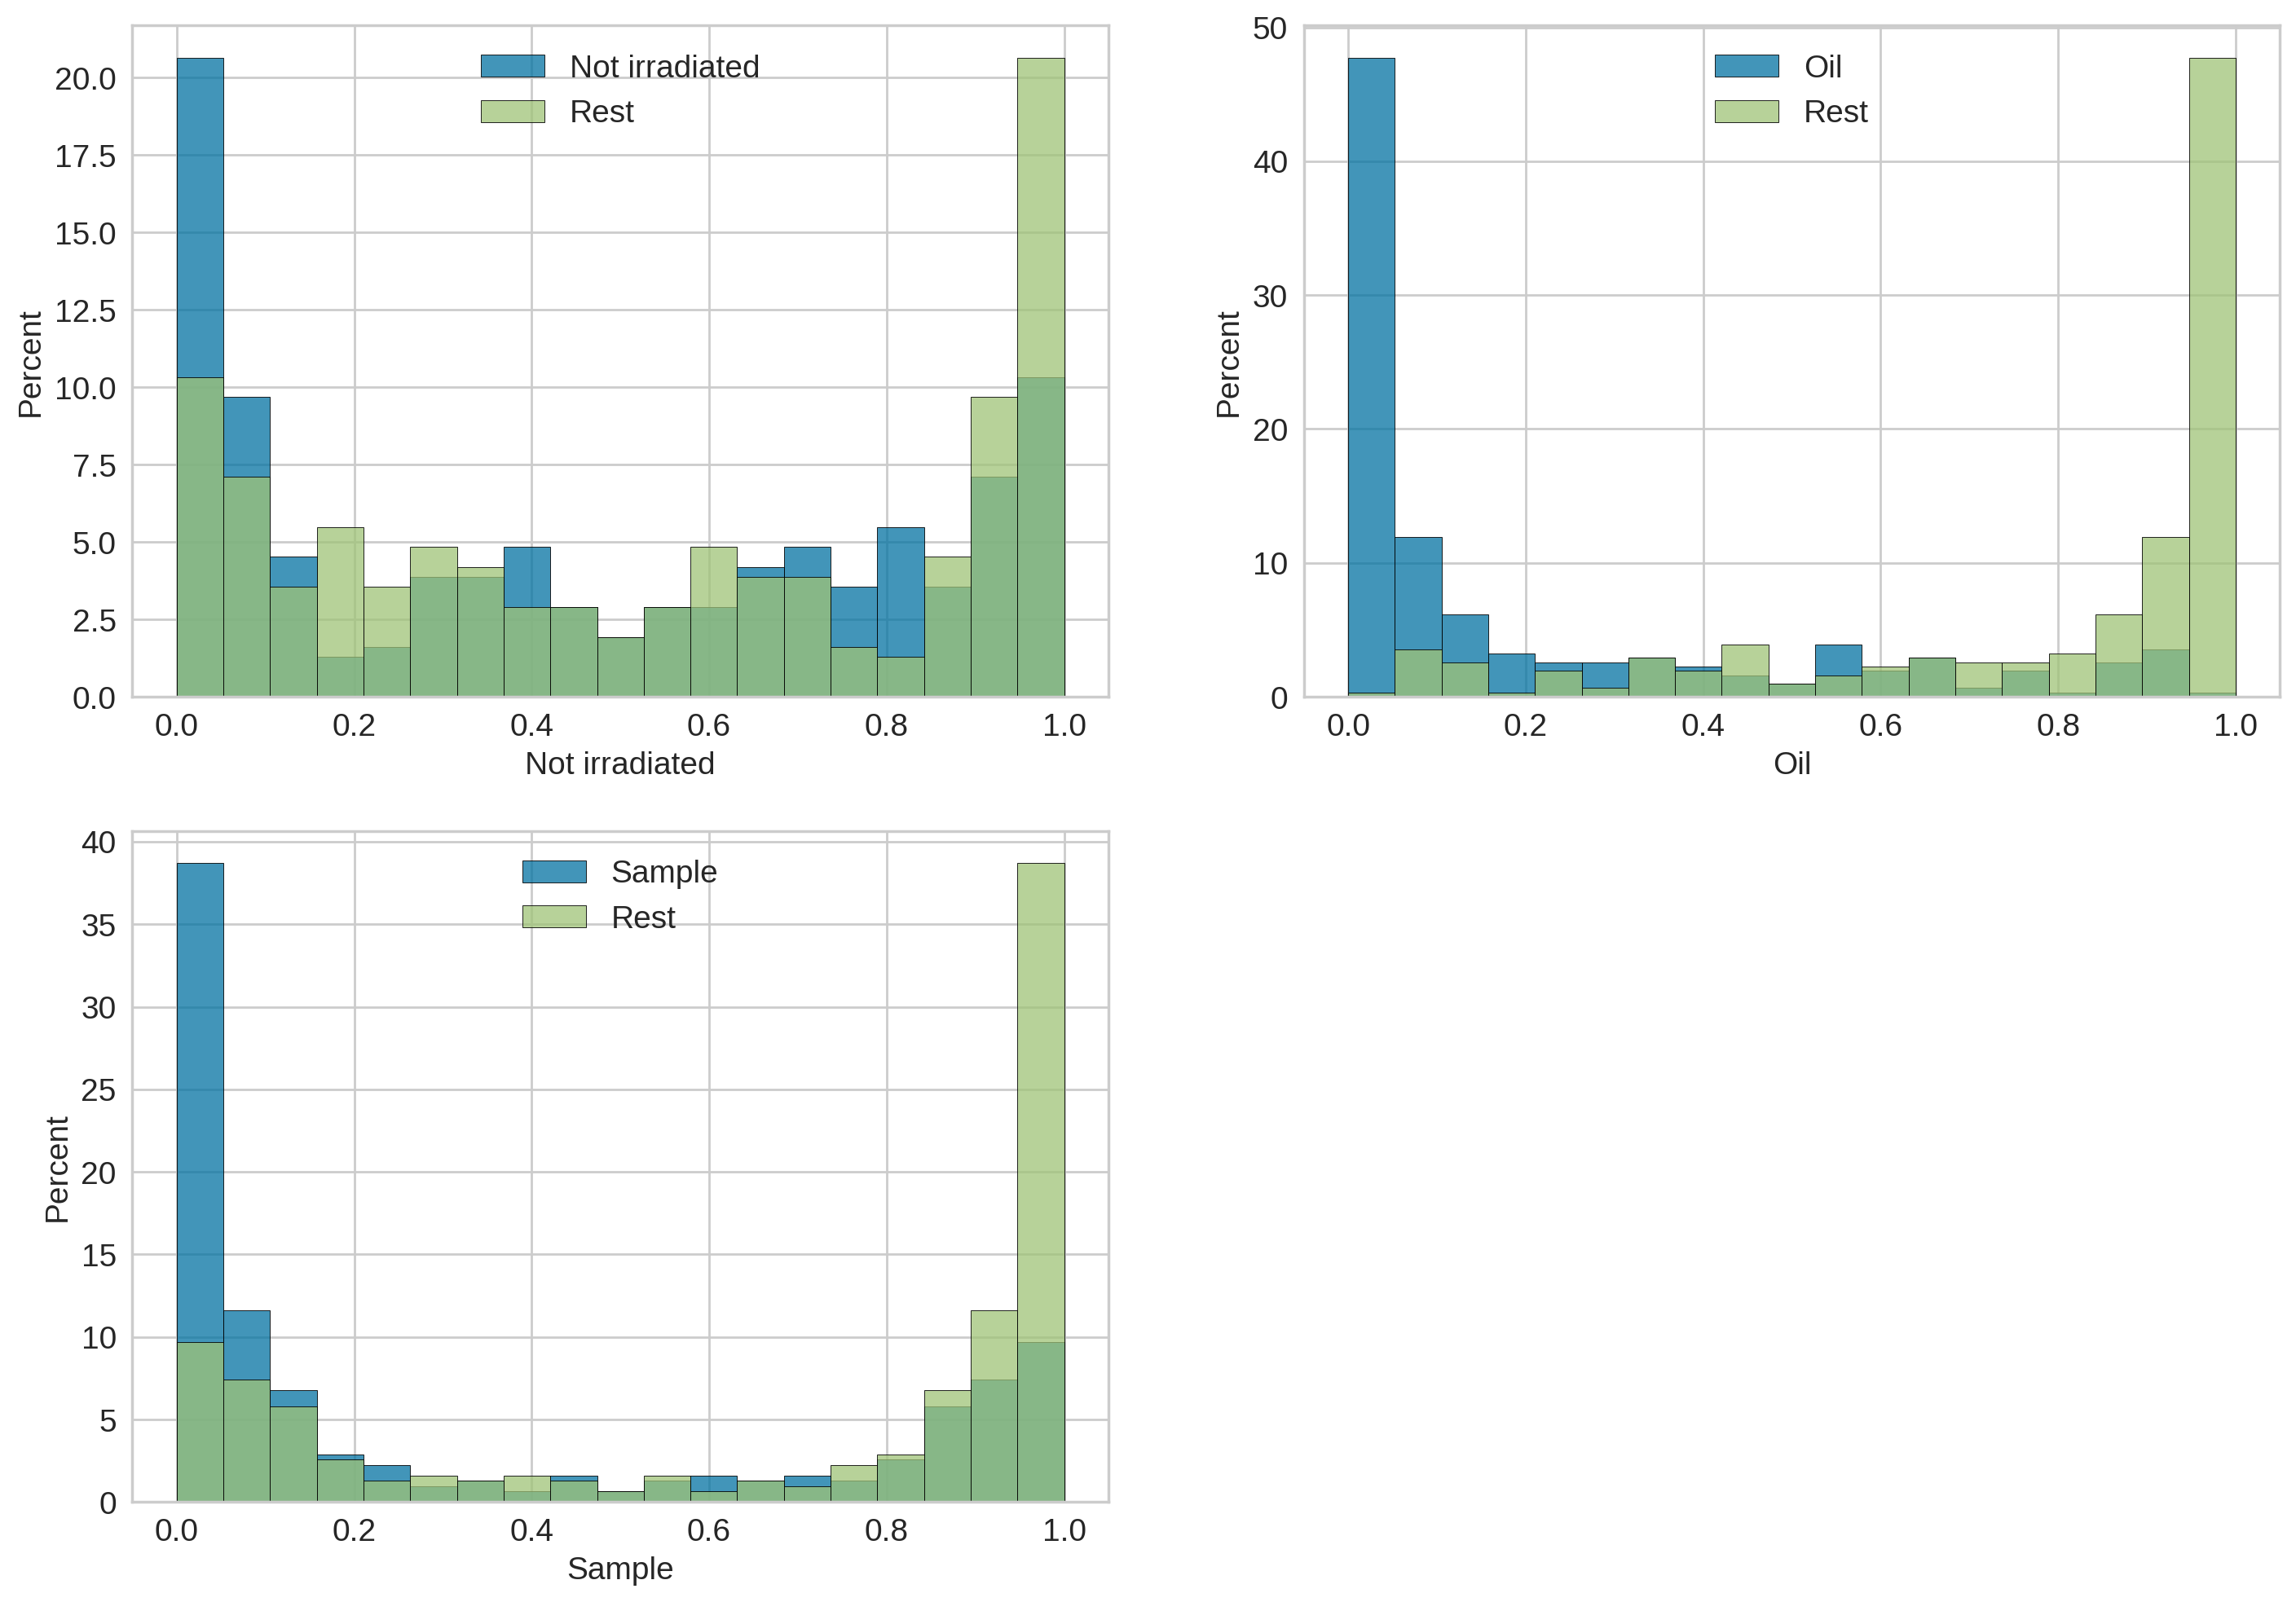

In [ ]:
#@title
plt.figure(figsize= (17,12), dpi = 200)
plt.subplot(2,2,1)
sns.histplot(data = df_class_dose, x = 'Not irradiated', color = 'b', label = 'Not irradiated', bins =np.linspace(0,1,20,endpoint=True), stat = 'percent')
sns.histplot(data = df_class_dose, x = 'Not irradiated_rest', color = 'g', label = 'Rest', bins =np.linspace(0,1,20,endpoint=True), stat = 'percent')
plt.legend()
plt.subplot(2,2,2)
sns.histplot(data = df_class_dose, x = 'Oil', color = 'b', label = 'Oil', bins =np.linspace(0,1,20,endpoint=True), stat = 'percent')
sns.histplot(data = df_class_dose, x = 'Oil_rest', color = 'g', label = 'Rest', bins =np.linspace(0,1,20,endpoint=True), stat = 'percent')
plt.legend()
plt.subplot(2,2,3)
sns.histplot(data = df_class_dose, x = 'Sample', color = 'b', label = 'Sample', bins =np.linspace(0,1,20,endpoint=True), stat = 'percent')
sns.histplot(data = df_class_dose, x = 'Sample_rest', color = 'g', label = 'Rest', bins =np.linspace(0,1,20,endpoint=True), stat = 'percent')
plt.legend()

### Only Irradiation Classification

See the final histogram. In this case, it is only a histogram because there are only two labels.

In [ ]:
#@title
df_class_dose['Irradiated_prob'] = Y_i_proba[:,1]
df_class_dose['Not_Irradiated_prob'] = Y_i_proba[:,0]

In [ ]:
#@title
model_i.classes_

array([0, 1])

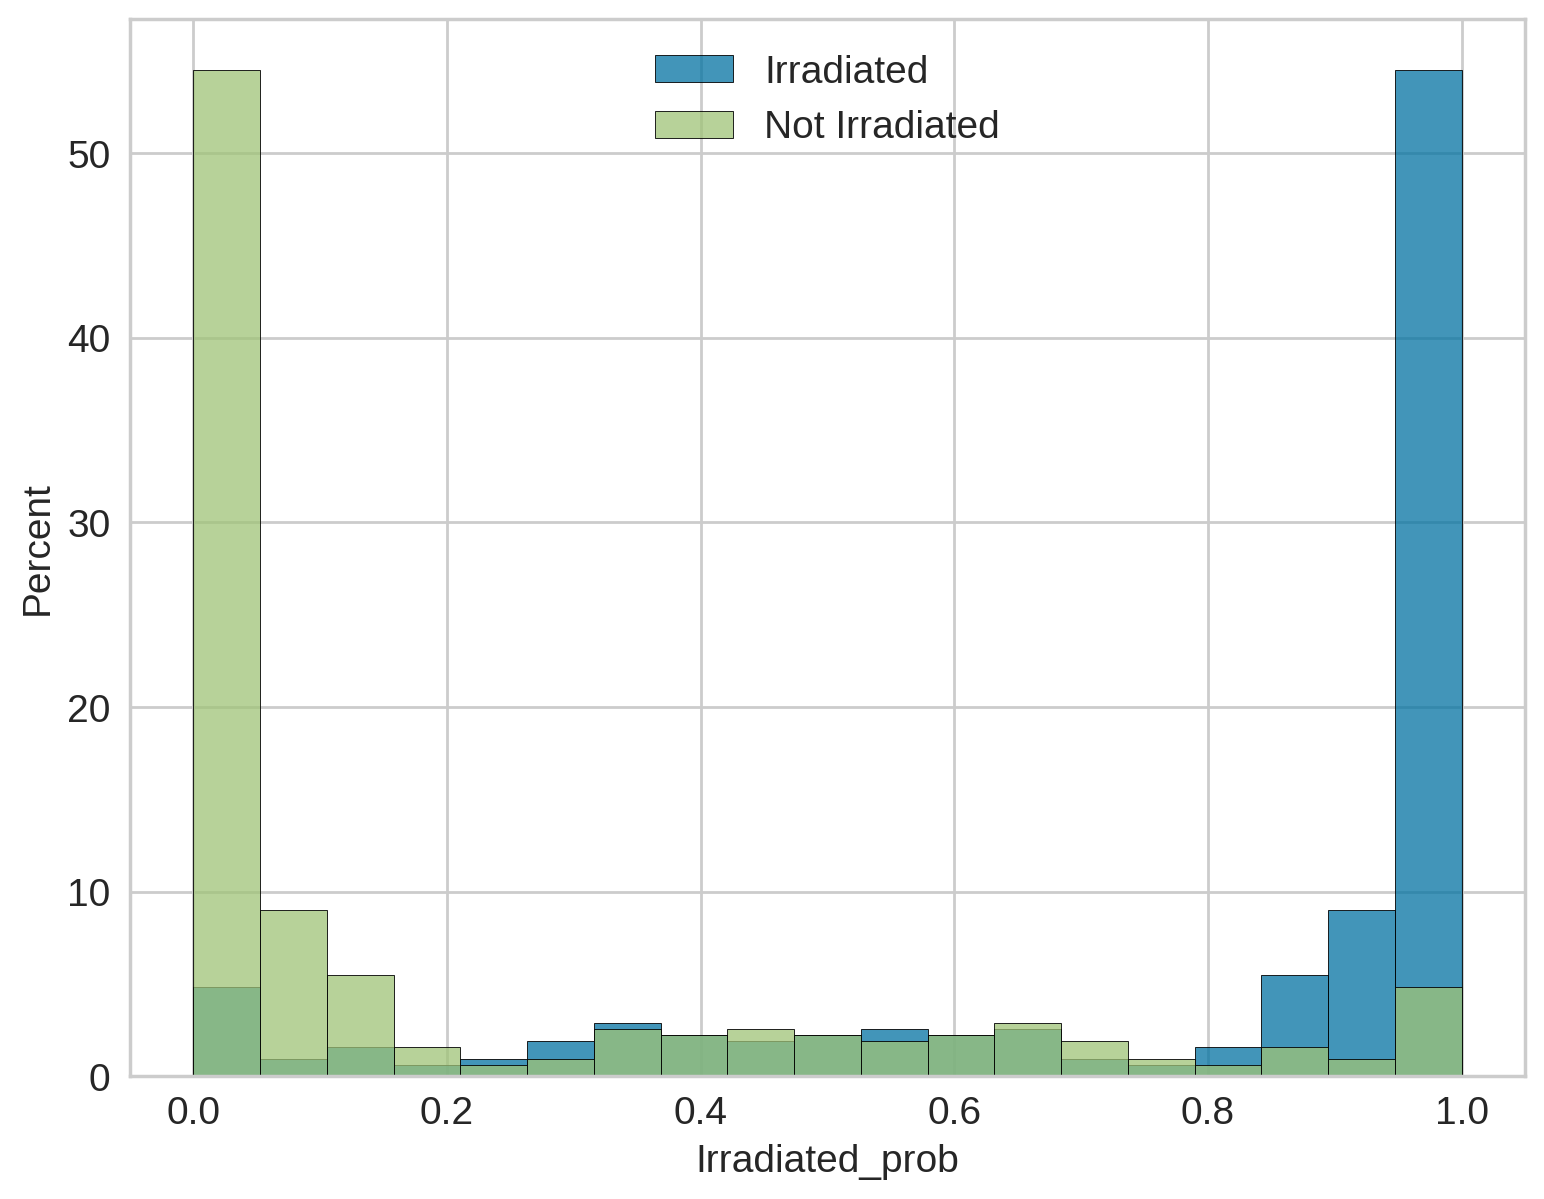

In [ ]:
#@title
plt.figure(figsize= (9,7), dpi = 200)
sns.histplot(data = df_class_dose, x = 'Irradiated_prob', color = 'b', label = 'Irradiated', bins =np.linspace(0,1,20,endpoint=True), stat = 'percent')
sns.histplot(data = df_class_dose, x = 'Not_Irradiated_prob', color = 'g', label = 'Not Irradiated', bins =np.linspace(0,1,20,endpoint=True), stat = 'percent')
plt.legend()

## ROC curve

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score

Create several functions to calculate the metrics needed for the ROC curve

In [ ]:
def calculate_tpr_fpr(y_real, y_pred):
    '''
    Calculates the True Positive Rate (tpr) and the True Negative Rate (fpr) based on real and predicted observations
    
    Args:
        y_real: The list or series with the real classes
        y_pred: The list or series with the predicted classes
        
    Returns:
        tpr: The True Positive Rate of the classifier
        fpr: The False Positive Rate of the classifier
    '''
    
    # Calculates the confusion matrix and recover each element
    cm = confusion_matrix(y_real, y_pred)
    TN = cm[0, 0]
    FP = cm[0, 1]
    FN = cm[1, 0]
    TP = cm[1, 1]
    
    # Calculates tpr and fpr
    tpr =  TP/(TP + FN) # sensitivity - true positive rate
    fpr = 1 - TN/(TN+FP) # 1-specificity - false positive rate
    
    return tpr, fpr

In [ ]:
def get_all_roc_coordinates(y_real, y_proba):
    '''
    Calculates all the ROC Curve coordinates (tpr and fpr) by considering each point as a threshold for the predicion of the class.
    
    Args:
        y_real: The list or series with the real classes.
        y_proba: The array with the probabilities for each class, obtained by using the `.predict_proba()` method.
        
    Returns:
        tpr_list: The list of TPRs representing each threshold.
        fpr_list: The list of FPRs representing each threshold.
    '''
    tpr_list = [0]
    fpr_list = [0]
    for i in range(len(y_proba)):
        threshold = y_proba[i]
        y_pred = y_proba >= threshold
        tpr, fpr = calculate_tpr_fpr(y_real, y_pred)
        tpr_list.append(tpr)
        fpr_list.append(fpr)
    return tpr_list, fpr_list

In [ ]:
def plot_roc_curve(tpr, fpr, scatter = True, ax = None):
    '''
    Plots the ROC Curve by using the list of coordinates (tpr and fpr).
    
    Args:
        tpr: The list of TPRs representing each coordinate.
        fpr: The list of FPRs representing each coordinate.
        scatter: When True, the points used on the calculation will be plotted with the line (default = True).
    '''
    if ax == None:
        plt.figure(figsize = (5, 5))
        ax = plt.axes()
    
    if scatter:
        sns.scatterplot(x = fpr, y = tpr, ax = ax)
    sns.lineplot(x = fpr, y = tpr, ax = ax)
    sns.lineplot(x = [0, 1], y = [0, 1], color = 'green', ax = ax)
    plt.xlim(-0.05, 1.05)
    plt.ylim(-0.05, 1.05)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")

In [ ]:
#@title
!pip install yellowbrick

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from yellowbrick.classifier import ROCAUC

### ROC for Dose classification

See the classes available

In [ ]:
model_dose.classes_

array([ 0., 10., 15., 20.])

In [ ]:
#@title
visualizer = ROCAUC(estimator = model_dose, classes = ['0 KGy', '10 KGy', '15 KGy', '20 KGy'], micro = False, macro = False, per_class =True)

Text(0, 0.5, 'True positive rate')

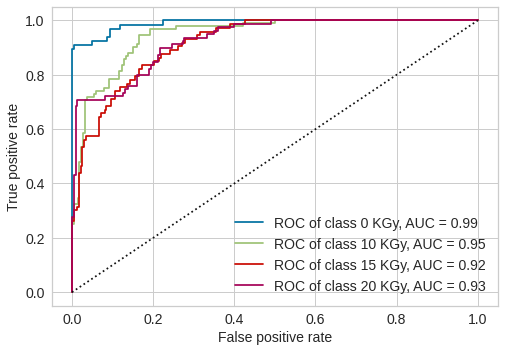

In [ ]:
#@title
visualizer.fit(X, Y1)
visualizer.score(X, Y1)
plt.legend()
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')

### ROC for irradiation stage

See the classes available

In [ ]:
#@title
model_is.classes_

array(['Not irradiated', 'Oil', 'Sample'], dtype=object)

In [ ]:
#@title
visualizer = ROCAUC(estimator = model_is, classes = ['Not irradiated', 'Oil', 'Sample'], micro = False, macro = False, per_class =True)

Text(0, 0.5, 'True positive rate')

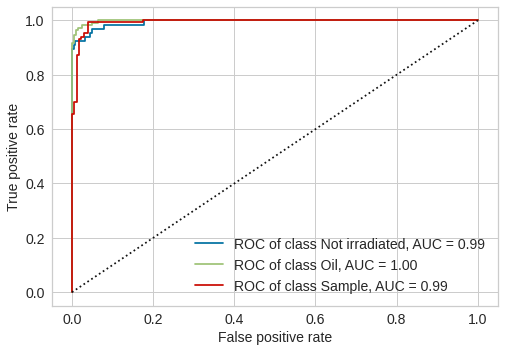

In [ ]:
#@title
visualizer.fit(X, Y2)
visualizer.score(X, Y2)
plt.legend()
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')

### Plot ROC for only irradiation

See the classes available

In [ ]:
#@title
model_i.classes_

array([0, 1])

In [ ]:
#@title
visualizer = ROCAUC(estimator = model_i, classes = ['Not irradiated', 'Irradiated'], micro = False, macro = False, per_class =True)

Text(0, 0.5, 'True positive rate')

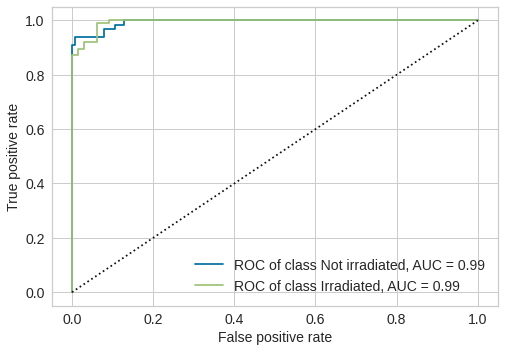

In [ ]:
#@title
visualizer.fit(X, Y3)
visualizer.score(X, Y3)
plt.legend()
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')

## Pie and bar Charts

### Dose classification

See how the results are distribuited

In [ ]:
#@title
real_f = np.unique(Y1, return_counts=True)[1]
predicted_f = np.unique(Y_dose, return_counts=True)[1]

In [ ]:
#@title
# Convertir las frecuencias en proporciones
proporciones_real = real_f / real_f.sum()
proporciones_pred = predicted_f / predicted_f.sum()

In [ ]:
#@title
df = pd.DataFrame()
df['Proporciones'] = np.concatenate((proporciones_real, proporciones_pred))
df['Data'] = ['Original','Original','Original','Original','Predicted','Predicted','Predicted','Predicted']
df['Dose'] = ['0 KGy', '10 KGy', '15 KGy', '20 KGy', '0 KGy', '10 KGy', '15 KGy', '20 KGy']

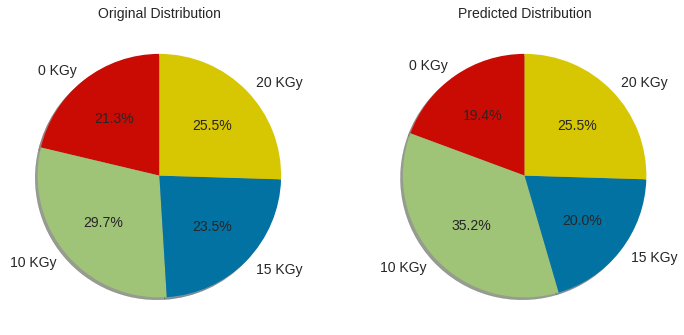

In [ ]:
#@title
# Crear el gráfico de pastel
plt.figure(figsize = (12,7))
plt.subplot(1,2,1)
colores = ['r', 'g', 'b', 'y']
plt.pie(proporciones_real, labels=['0 KGy', '10 KGy', '15 KGy', '20 KGy'], autopct='%1.1f%%', startangle=90, shadow=True, colors=colores)
plt.title('Original Distribution')
plt.subplot(1,2,2)
plt.pie(proporciones_pred, labels=['0 KGy', '10 KGy', '15 KGy', '20 KGy'], autopct='%1.1f%%', startangle=90, shadow=True, colors=colores)
plt.title('Predicted Distribution')
plt.show()

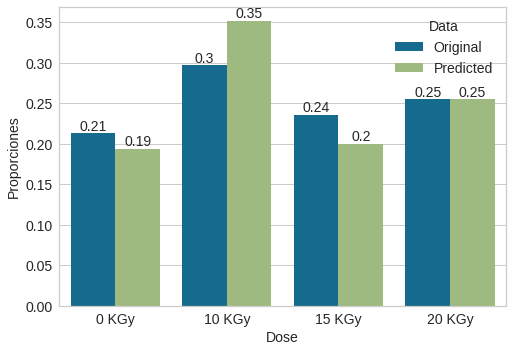

In [ ]:
#@title
ax = sns.barplot(data = df, x ='Dose', y='Proporciones', hue = 'Data')
for container in ax.containers:
    ax.bar_label(container, labels=np.round(container.datavalues, 2))

### Irradiation Stage Classification

See how the results are distribuited

In [ ]:
#@title
real_f = np.unique(Y2, return_counts=True)[1]
predicted_f = np.unique(Y_is, return_counts=True)[1]

In [ ]:
#@title
# Convertir las frecuencias en proporciones
proporciones_real = real_f / real_f.sum()
proporciones_pred = predicted_f / predicted_f.sum()

In [ ]:
#@title
df = pd.DataFrame()
df['Proporciones'] = np.concatenate((proporciones_real, proporciones_pred))
df['Data'] = ['Original','Original','Original','Predicted','Predicted','Predicted']
df['Irradiation Stage'] = ['Not irradiated', 'Oil', 'Sample', 'Not irradiated', 'Oil', 'Sample']

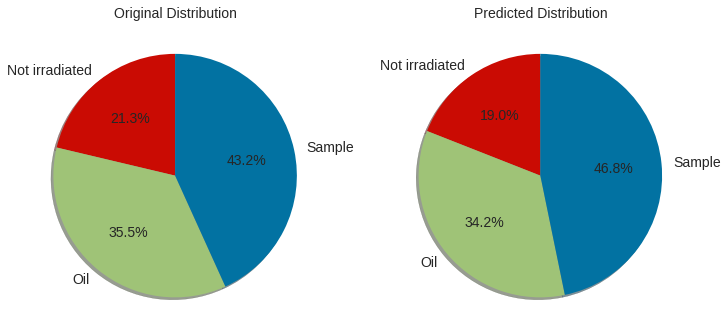

In [ ]:
#@title
# Crear el gráfico de pastel
plt.figure(figsize = (12,7))
plt.subplot(1,2,1)
colores = ['r', 'g', 'b', 'y']
plt.pie(proporciones_real, labels=['Not irradiated', 'Oil', 'Sample'], autopct='%1.1f%%', startangle=90, shadow=True, colors=colores)
plt.title('Original Distribution')
plt.subplot(1,2,2)
plt.pie(proporciones_pred, labels=['Not irradiated', 'Oil', 'Sample'], autopct='%1.1f%%', startangle=90, shadow=True, colors=colores)
plt.title('Predicted Distribution')
plt.show()

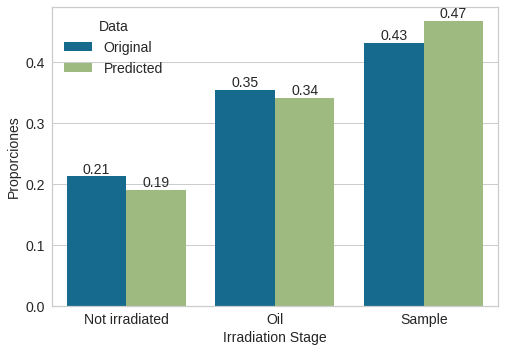

In [ ]:
#@title
ax = sns.barplot(data = df, x ='Irradiation Stage', y='Proporciones', hue = 'Data')
for container in ax.containers:
    ax.bar_label(container, labels=np.round(container.datavalues, 2))

### Only irradiation

See how the results are distribuited

In [ ]:
#@title
real_f = np.unique(Y3, return_counts=True)[1]
predicted_f = np.unique(Y_i, return_counts=True)[1]

In [ ]:
#@title
# Convertir las frecuencias en proporciones
proporciones_real = real_f / real_f.sum()
proporciones_pred = predicted_f / predicted_f.sum()

In [ ]:
#@title
df = pd.DataFrame()
df['Proporciones'] = np.concatenate((proporciones_real, proporciones_pred))
df['Data'] = ['Original','Original','Predicted','Predicted']
df['Irradiation'] = ['Not irradiated', 'Irradiated','Not irradiated', 'Irradiated']

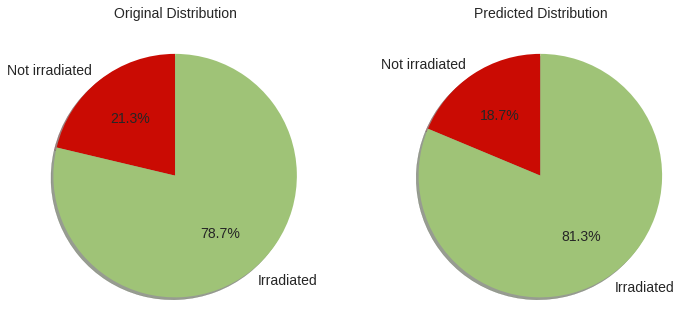

In [ ]:
#@title
# Crear el gráfico de pastel
plt.figure(figsize = (12,7))
plt.subplot(1,2,1)
colores = ['r', 'g', 'b', 'y']
plt.pie(proporciones_real, labels=['Not irradiated', 'Irradiated'], autopct='%1.1f%%', startangle=90, shadow=True, colors=colores)
plt.title('Original Distribution')
plt.subplot(1,2,2)
plt.pie(proporciones_pred, labels=['Not irradiated', 'Irradiated'], autopct='%1.1f%%', startangle=90, shadow=True, colors=colores)
plt.title('Predicted Distribution')
plt.show()

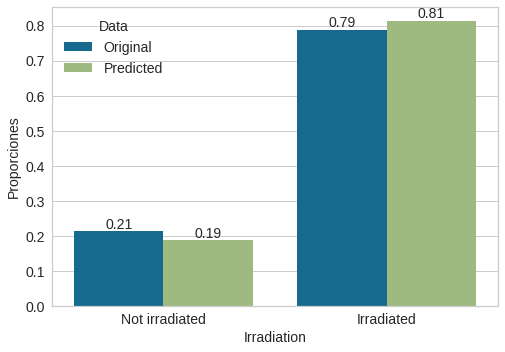

In [ ]:
#@title
ax = sns.barplot(data = df, x ='Irradiation', y='Proporciones', hue = 'Data')
for container in ax.containers:
    ax.bar_label(container, labels=np.round(container.datavalues, 2))